In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
# Opciones de matplotlib
rc=plt.rcParams
rc['figure.figsize']=[15,5]

# Para mostrar todas las columnas cuando se imprime un df
pd.set_option('display.max_columns', None)
import networkx as nx

In [37]:
archivo="https://raw.githubusercontent.com/blancavazquez/CursoDatosMasivosII/2023-I/notebooks/data_hist.txt"
df=pd.read_csv(archivo,header=None,sep='\s')
df

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,0,1
0,1,2
1,1,3
2,1,4
3,2,1
4,2,4
5,3,5
6,4,2
7,4,3


In [52]:
def HITman(n_iter, G):
    for i in range(len(G.nodes)):
        G.add_node(i,auth=[1,0],hub=[1,0])
        
    for k in range(n_iter):
        for g in G.nodes:
            G.nodes[g]['auth'][1]=0
            G.nodes[g]['hub'][1]=0
            for g_pred in G.predecessors(g):
                G.nodes[g]['auth'][1]+=G.nodes[g_pred]['hub'][0]
            for g_pred in G.successors(g):
                G.nodes[g]['hub'][1]+=G.nodes[g_pred]['auth'][0]
        for g in G.nodes:
            G.nodes[g]['auth'][0]=G.nodes[g]['auth'][1]
            G.nodes[g]['hub'][0]=G.nodes[g]['hub'][1]
    return G

def read_HIT(G, n_iter):  
    total_auth=0
    total_hub=0
    dicc=nx.hits(G,max_iter=n_iter,tol=0)
    for g in G.nodes:
        total_auth+=G.nodes[g]['auth'][1]
        total_hub+=G.nodes[g]['hub'][1]
    for g in G.nodes:
        print('Nodo ',g,'\n','-'*64)
        print('HUB artesanal :', G.nodes[g]['hub'][1]/total_hub)
        print('AUTH artesanal :', G.nodes[g]['auth'][1]/total_hub)


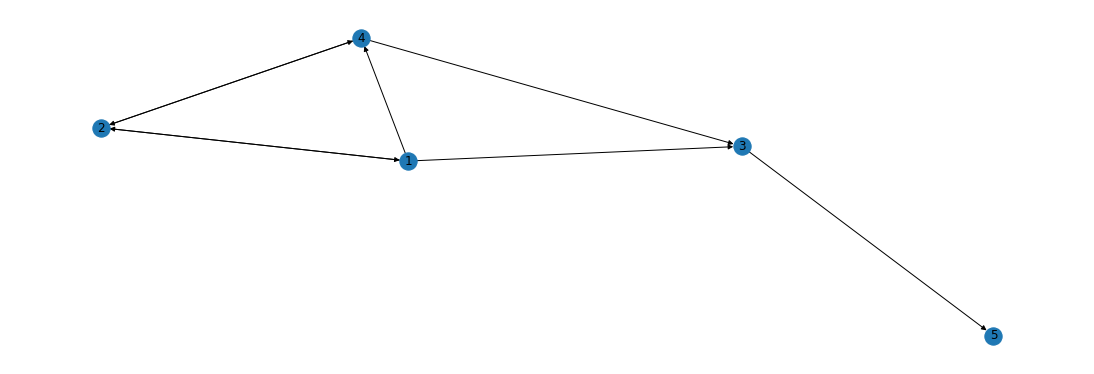

In [39]:
G=nx.DiGraph()

for i in range(1,6):
    G.add_node(i,auth=[1,0],hub=[1,0])

for a in df.iterrows():
    G.add_edge(a[1][0],a[1][1])
nx.draw(G,with_labels=True,pos = nx.spring_layout(G))

In [51]:
G1=HITman(n_iter=50,n_nodes=100)
read_HIT(G1, 50)

Nodo  0 
 ----------------------------------------------------------------
HUB artesanal : 0.026310831642047228
HUB: 0.02536771181815625
AUTH artesanal : 0.0052115431124548535
AUTH: 0.01155505665343623
Error:  -0.000943119823890979 -0.014755774988610998
Nodo  1 
 ----------------------------------------------------------------
HUB artesanal : 0.006260203816010701
HUB: 0.005787625301500407
AUTH artesanal : 0.005223971904546609
AUTH: 0.01103913024483128
Error:  -0.0004725785145102933 0.004778926428820579
Nodo  2 
 ----------------------------------------------------------------
HUB artesanal : 0.013965771636647199
HUB: 0.013104406844707456
AUTH artesanal : 0.0006220493261579746
AUTH: 0.0013355630006141239
Error:  -0.0008613647919397428 -0.012630208636033074
Nodo  3 
 ----------------------------------------------------------------
HUB artesanal : 0.0051649176438195
HUB: 0.004904026109068873
AUTH artesanal : 0.0
AUTH: -0.0
Error:  -0.00026089153475062667 -0.0051649176438195
Nodo  4 
 ----